# TEXT MINING for PRACTICE: 단어 임베딩 훈련
- Keras를 이용한 텍스트마이닝
---

# 1. 패키지 설정

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# 2. 임베딩 레이어 정의

In [4]:
embedding_layer = layers.Embedding(1000, 5)


## 2-1. 샘플 데이터 삽입

In [5]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy()

array([[ 0.02399235,  0.00691019,  0.03113631,  0.00412173, -0.04508485],
       [ 0.04118471, -0.00639027,  0.04838857, -0.04779456, -0.02365748],
       [-0.01749865,  0.03613638,  0.01046047, -0.00102311, -0.01909387]],
      dtype=float32)

## 2-2. 배치 (batch) 로 삽입

In [6]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
result.shape

TensorShape([2, 3, 5])

# 3. 학습 데이터 다운로드

In [7]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

W1122 17:33:48.042588 4450868672 deprecation.py:323] From /Users/seojungwon/anaconda3/lib/python3.6/site-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/seojungwon/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [8]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [9]:
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

In [10]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[7968, 5032, 7961, ...,    0,    0,    0],
       [4441,   36,   25, ...,    0,    0,    0],
       [  62,    9,   41, ...,    0,    0,    0],
       ...,
       [  19,  347, 3000, ..., 3273,  297, 7975],
       [ 156,   37,   52, ...,    0,    0,    0],
       [ 153,  372, 1963, ...,    0,    0,    0]])

# 4. 모델 정의 (C BoW)

In [11]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


# 5. 모델 훈련

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

W1122 17:36:07.174317 4450868672 deprecation.py:323] From /Users/seojungwon/anaconda3/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
2500/2500 [==============================] - 24s 9ms/step - loss: 0.4976 - accuracy: 0.7628 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2803 - accuracy: 0.8962 - val_loss: 0.2785 - val_accuracy: 0.8900
Epoch 3/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2274 - accuracy: 0.9179 - val_loss: 0.2733 - val_accuracy: 0.8800
Epoch 4/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.1939 - accuracy: 0.9315 - val_loss: 0.2171 - val_accuracy: 0.9200
Epoch 5/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1688 - accuracy: 0.9414 - val_loss: 0.4410 - val_accuracy: 0.8200
Epoch 6/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1545 - accuracy: 0.9486 - val_loss: 0.3800 - val_accuracy: 0.8650
Epoch 7/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1386 - accuracy: 0.9534 - val_loss: 0.4410 

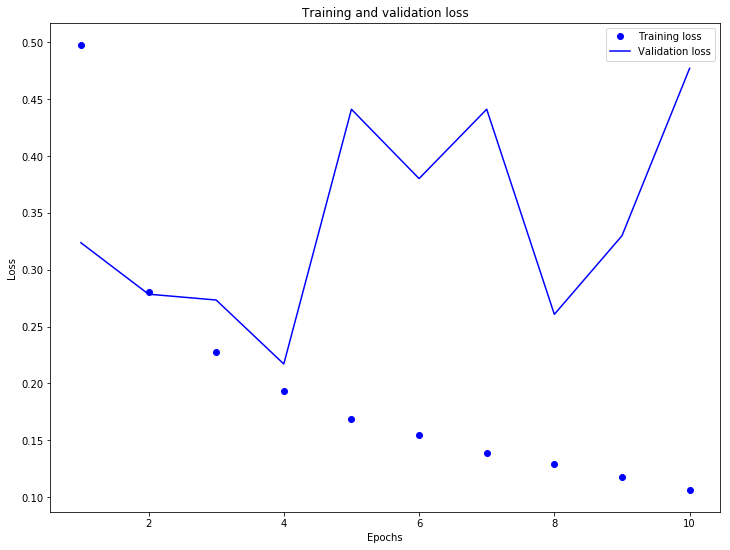

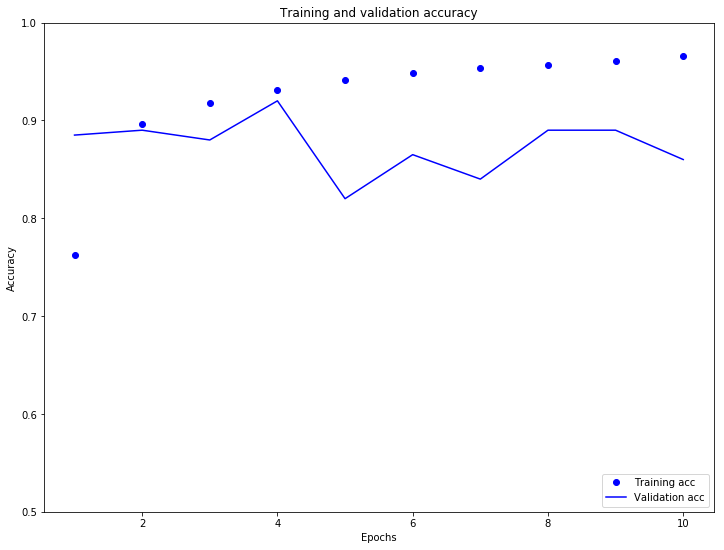

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

# 6. 임베딩 추출

In [15]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


In [16]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
    vec = weights[num+1] # skip 0, it's padding.
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

In [17]:
try:
    from google.colab import files
except ImportError:
    pass
else:
    files.download('vecs.tsv')
    files.download('meta.tsv')